In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data_reader

In [3]:
start  = '2010-01-01'
end = '2022-01-01'

df = data_reader.DataReader('AAPl','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451719
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482605


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451719
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482605


In [5]:
#axis param - control wheter is row or column name
df = df.drop(['Date', 'Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


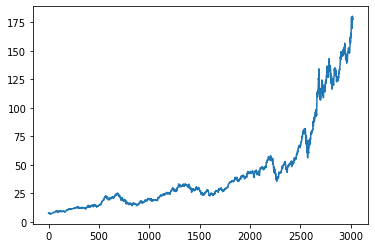

In [6]:
plt.plot(df.Close)

In [7]:
ma100 =  df.Close.rolling(100).mean()
ma100
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3016    142.85570
3017    143.13220
3018    143.40125
3019    143.66845
3020    143.95365
Name: Close, Length: 3021, dtype: float64

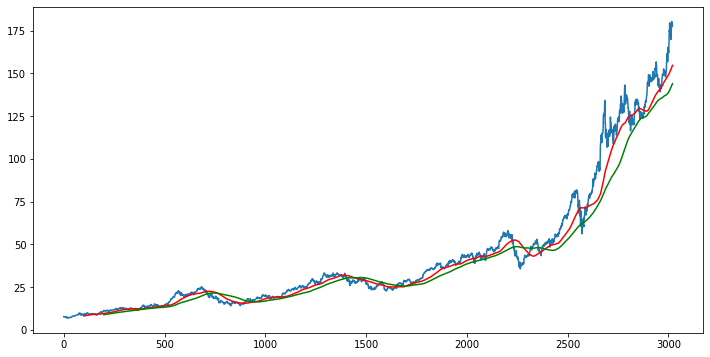

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, "r")
plt.plot(ma200, "g")

In [9]:
df.shape

(3021, 5)

In [10]:
#splitting data into training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*.7):])
print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(907, 1)


In [11]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [12]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)
print(data_training_array)

[[0.0192931 ]
 [0.01961817]
 [0.01662229]
 ...
 [0.98966821]
 [0.98837669]
 [0.9910212 ]]


In [26]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i]) #starts at 0
    y_train.append(data_training_array[i,0]) #starts at 100
x_train, y_train = np.array(x_train), np.array(y_train)

In [28]:
x_train.shape

(2014, 100, 1)

In [25]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [29]:
#ML Model
model = Sequential()

model.add(LSTM(units =  50, activation = "relu", return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units =  60, activation = "relu", return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units =  80, activation = "relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units =  120, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



2022-04-19 16:18:45.024139: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [35]:
model.compile(optimizer = "adam", loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
63/63 [==============================] - 17s 199ms/step - loss: 0.0022
Epoch 2/50
63/63 [==============================] - 13s 203ms/step - loss: 0.0023
Epoch 3/50
63/63 [==============================] - 12s 195ms/step - loss: 0.0019
Epoch 4/50
63/63 [==============================] - 11s 175ms/step - loss: 0.0018
Epoch 5/50
63/63 [==============================] - 11s 167ms/step - loss: 0.0019
Epoch 6/50
63/63 [==============================] - 11s 168ms/step - loss: 0.0019
Epoch 7/50
63/63 [==============================] - 11s 169ms/step - loss: 0.0023
Epoch 8/50
63/63 [==============================] - 11s 168ms/step - loss: 0.0018
Epoch 9/50
63/63 [==============================] - 11s 168ms/step - loss: 0.0017
Epoch 10/50
63/63 [==============================] - 11s 170ms/step - loss: 0.0020
Epoch 11/50
63/63 [==============================] - 11s 168ms/step - loss: 0.0020
Epoch 12/50
63/63 [==============================] - 12s 183ms/step - loss: 0.0019
Epoch 13/50
6

In [67]:
model.save('keras_model.h5')

In [38]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [40]:
past_100_days = data_training.tail(100)

In [44]:
final_df = past_100_days.append(data_testing, ignore_index=True)

/var/folders/21/1lgl4bt141nf87j2l6lc_nw00000gn/T/ipykernel_9876/531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [45]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [47]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [49]:
input_data.shape

(1007, 1)

In [63]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [53]:
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [64]:
#making Predictions
y_predicted =  model.predict(x_test)

In [55]:
y_predicted.shape

(907, 1)

In [56]:
y_test

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [58]:
y_predicted

array([[0.15968709],
       [0.16053724],
       [0.16130309],
       [0.16195801],
       [0.16261473],
       [0.16335188],
       [0.16422366],
       [0.16523106],
       [0.16631033],
       [0.16733916],
       [0.16824612],
       [0.16904746],
       [0.16969857],
       [0.17021175],
       [0.17054191],
       [0.1707063 ],
       [0.17063871],
       [0.17039767],
       [0.17000636],
       [0.16949868],
       [0.16883203],
       [0.1681152 ],
       [0.16739604],
       [0.16675399],
       [0.16619542],
       [0.16578665],
       [0.1654108 ],
       [0.16508314],
       [0.16488042],
       [0.16489698],
       [0.16510834],
       [0.16537696],
       [0.16574974],
       [0.16621383],
       [0.16672513],
       [0.16726905],
       [0.16778529],
       [0.16830477],
       [0.16881108],
       [0.16930318],
       [0.16982566],
       [0.1704467 ],
       [0.17113915],
       [0.1717523 ],
       [0.17219968],
       [0.17248389],
       [0.17304999],
       [0.174

In [60]:
scaler.scale_

array([0.00690691])

In [65]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test*scale_factor

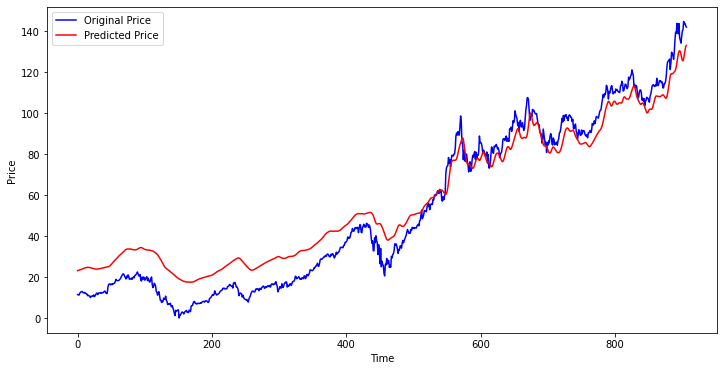

In [66]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()